
<h1> Data Visualization </h1>
<div>
In this notebook, we visualize the given data in different forms 
in order to understand the data better. This will also 
help us to select the dependent variables in the
machine learning parameter selection.
</div>
<div>
The detail of this problem and the data set can be seen at the following address.
https://www.kaggle.com/c/titanic/data.
</div>

In [129]:
# Importing the standard libraries
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import Counter
# Importing function other file
from data_loader import data_loader

<h1> Age distribution </h1>
From the given training data, (considering only those passengers whose age is known) we plot the distribution of different
age groups of the people in the titanic. 

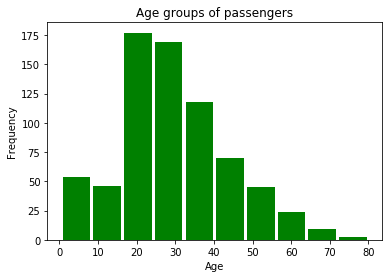

In [89]:
x, y = data_loader("train.csv")
data = x + y
passengers_age = [data[i][0][2] for i in range(len(data)) if data[i][0][2] != ""] 
plt.hist(passengers_age, rwidth=0.9, color='g')
plt.title("Age groups of passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<h1> Sex and survival distribution </h1>
Now, let us the distribution of survived/died passengers based on their sex.

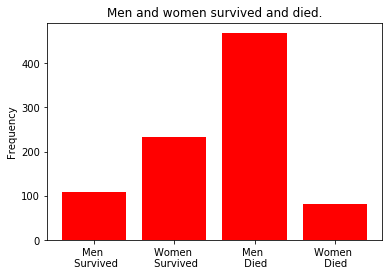

Total male passengers:  577
Total female passengers:  314
Men passenger's survival ratio:  0.18890814558058924
Women passenger's survival ratio:  0.7420382165605095


In [113]:

men_survived = ["Men \n Survived" for i in range(len(data)) 
                if data[i][1][0] == 1 and data[i][0][1] == 1]
women_survived = ["Women \n Survived" for i in range(len(data)) 
                  if data[i][1][0] == 1 and data[i][0][1] == 0]
men_died = ["Men \n Died" for i in range(len(data)) 
            if data[i][1][0] == 0 and data[i][0][1] == 1]
women_died = ["Women \n Died" for i in range(len(data)) 
              if data[i][1][0] == 0 and data[i][0][1] == 0]
# Concatenate all the above four lists             
combined = men_survived + women_survived + men_died + women_died
counts = Counter(combined)
X = np.arange(len(counts))
plt.bar(X, counts.values(), color='r')
plt.xticks(X, counts.keys())
plt.title("Men and women survived and died.")
plt.ylabel("Frequency")
plt.show()

# Total passengers with known age:
total_men = len(men_survived)+len(men_died)
total_women = len(women_survived)+len(women_died)
print("Total male passengers: ", total_men)
print("Total female passengers: ", total_women )
print("Men passenger's survival ratio: ", len(men_survived)/total_men)
print("Women passenger's survival ratio: ", len(women_survived)/total_women)


<h1> Ticket class and passenger survivality </h1>
Data distribution based on the pclass - passenger class in the ship.
pclass: It is also the socio-economic measure of the passengers, with following classes:
1st = Upper
2nd = Middle
3rd = Lower

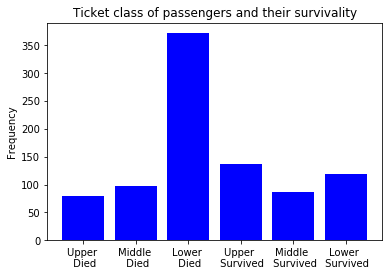

In [180]:
upper_died = ["Upper \n Died" for i in range(len(data)) 
                if data[i][1][0] == 0 and data[i][0][0] == 1]
middle_died = ["Middle \n Died" for i in range(len(data)) 
                if data[i][1][0] == 0 and data[i][0][0] == 2]
lower_died = ["Lower \n Died" for i in range(len(data)) 
                if data[i][1][0] == 0 and data[i][0][0] == 3]
upper_survived = ["Upper \n Survived" for i in range(len(data)) 
                if data[i][1][0] == 1 and data[i][0][0] == 1]
middle_survived = ["Middle \n Survived" for i in range(len(data)) 
                if data[i][1][0] == 1 and data[i][0][0] == 2]
lower_survived = ["Lower \n Survived" for i in range(len(data)) 
                if data[i][1][0] == 1 and data[i][0][0] == 3]
total_survived = len(upper_survived) + len(middle_survived) + len(lower_survived)

# Concatenating all the above six lists             
combined = upper_died + middle_died + lower_died + upper_survived + middle_survived + lower_survived
counts = Counter(combined)
X = np.arange(len(counts))
plt.bar(X, counts.values(), color='b')
plt.xticks(X, counts.keys())
plt.title("Ticket class of passengers and their survivality")
plt.ylabel("Frequency")
plt.show()

<h1> Passenger's survivality with number of siblings and relatives in the ship </h1>  

Let us see the distribution of survavility of the passengers based on the number of relatives of the 
passengers in the ship.

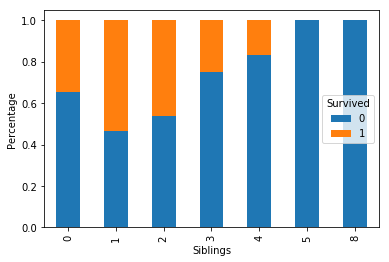

In [204]:
train = pd.read_csv("train.csv")
sibling = pd.crosstab(train['SibSp'], train['Survived'])
fig = sibling.div(sibling.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
fig = plt.xlabel("Siblings")
fig = plt.legend(loc='right', title='Survived')
fig = plt.ylabel("Percentage")
fig = plt.show()

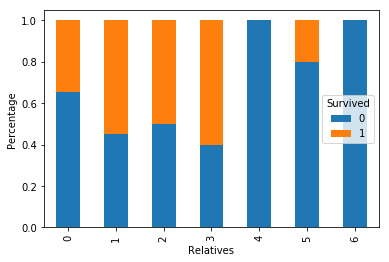

In [205]:
relatives = pd.crosstab(train['Parch'], train['Survived'])
fig = relatives.div(relatives.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.legend(loc='right', title="Survived")
fig = plt.xlabel("Relatives")
fig = plt.ylabel("Percentage")
fig = plt.show()

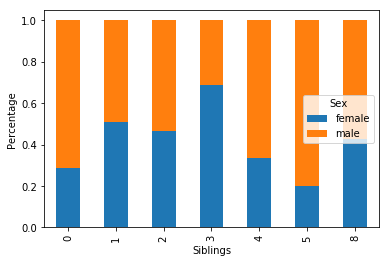

In [206]:
sibling = pd.crosstab(train['SibSp'], train['Sex'])
fig = sibling.div(sibling.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
fig = plt.xlabel("Siblings")
fig = plt.legend(loc='right', title='Sex')
fig = plt.ylabel("Percentage")
fig = plt.show()

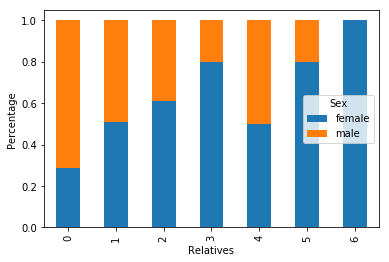

In [207]:
relatives = pd.crosstab(train['Parch'], train['Sex'])
fig = relatives.div(relatives.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.legend(loc='right', title="Sex")
fig = plt.xlabel("Relatives")
fig = plt.ylabel("Percentage")
fig = plt.show()

<h2> Survavility of a child in the ship <h2>

$$ If  Age(passenger) >= 10, passenger \rightarrow Child$$ 

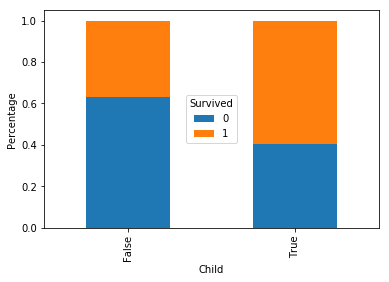

In [217]:
train['Child'] = train["Age"]<=10
child = pd.crosstab(train['Child'], train['Survived'])
fig = child.div(child.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
fig = plt.legend(loc='center', title="Survived")
fig = plt.xlabel("Child")
fig = plt.ylabel("Percentage")
fig = plt.show()